<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 2

En esta notebook trabajaremos con variables aleatorias contínuas y distribuciones de probabilidad conocidas. En lugar de la librería pandas, utilizaremos scipy que también implementa numerosas funciones útiles para proceso de datos numéricos.

## Ejercicio 1

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0.01e^{-0.01x} & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

* Hallar la F.d.a. de X

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

### Sol Ejercicio 1
La FDA es por definición:
$$ FDA(x)=\int_{-\infty}^{x} p(x')dx'$$
para $pdf=p(x)$.

Entonces utilizando la expresion analitica podemos simplemente efectuar la integracion:
$$ FDA(x)=\int_{-\infty}^{x} p(x')dx'=\int_{0}^{x} 0.01e^{-0.01x'}dx'=1-e^{-0.01x}$$
El cambio en el limite de integracion inferior es consecuencia de la definicion de la pdf.

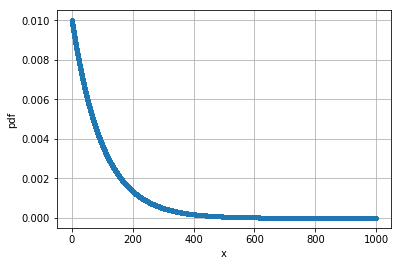

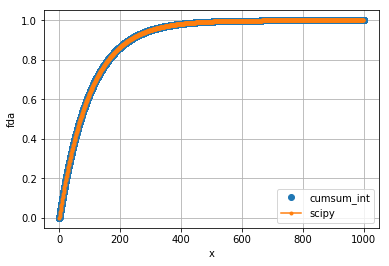

In [2]:
# ploteamos como para observar la distribucion
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
def pdf(x,a,b):
    return a*np.exp(-b*x)
xst=0.01;
xmin=0
xmax=1000;
a=0.01;
b=a;
x=np.arange(xmin,xmax,xst);
plt.plot(x,pdf(x,a,b),'.-')
plt.grid(True);
plt.xlabel('x');
plt.ylabel('pdf');
plt.show()

plt.figure
# probamos una integracion simple
plt.plot(x,np.cumsum(pdf(x,a,b))*xst,'o')
x2=np.arange(xmin,xmax,1);
# o utilizamos scipy.integrate
def fdavec(x,a,b):
    fda=[]
    for i in range(0,len(x)):
        fda.extend([integrate.quad(pdf,x[0],x[i],args=(a,b,))[0]])
    return np.array(fda)

plt.plot(x2,fdavec(x2,a,b),'.-')        
plt.xlabel('x');
plt.ylabel('fda');
plt.legend(['cumsum_int','scipy'])
plt.grid(True)
plt.show()

In [3]:
#* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?
# Esto lo podemos computar como P(50<x<150)=FDA(150)-FDA(50)
prob=integrate.quad(pdf,0,150,args=(a,b,))[0]-integrate.quad(pdf,0,50,args=(a,b,))[0]
pACstr= 'P(50<x<150)= FDA(150) - FDA(50) = %f' % prob 
print(pACstr)

P(50<x<150)= FDA(150) - FDA(50) = 0.383400


In [4]:
#* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?
# Esto lo podemos computar como P(x>100)=1-FDA(100)
prob=1-integrate.quad(pdf,0,100,args=(a,b,))[0]
pACstr= 'P(x>100)= 1 - FDA(100) = %f' % prob 
print(pACstr)

P(x>100)= 1 - FDA(100) = 0.367879


## Ejercicio 2

Modificar los valores de mu, sigma y el rango de la siguiente distribución normal. Escribir un breve resumen sobre como se relacionan estas variables sobre el dibujo de la campana de Gauss.

In [8]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters for normal distribution.
mu = 0
sigma = 5
rng = range(-20,30)

In [46]:
def graphic_normal(mu, sigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
    plt.title('Probability density function of normal distribution')


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulative distribution function of normal distribution')

    # Draw 1000 samples from the random variable.
    sample = dist.rvs(size=n_examples)

    print("Sample descriptive statistics:")
    print(pd.DataFrame(sample).describe())

    # Plot a histogram of the samples.
    plt.subplot(313)
    plt.hist(sample, bins=100, normed=True)
    plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
    plt.title('{} random samples from normal distribution'.format(n_examples))

    plt.tight_layout()  # Make space for titles 

Sample descriptive statistics:
                  0
count  10000.000000
mean      -0.018084
std        4.971923
min      -19.418868
25%       -3.288420
50%        0.025092
75%        3.301084
max       17.607412


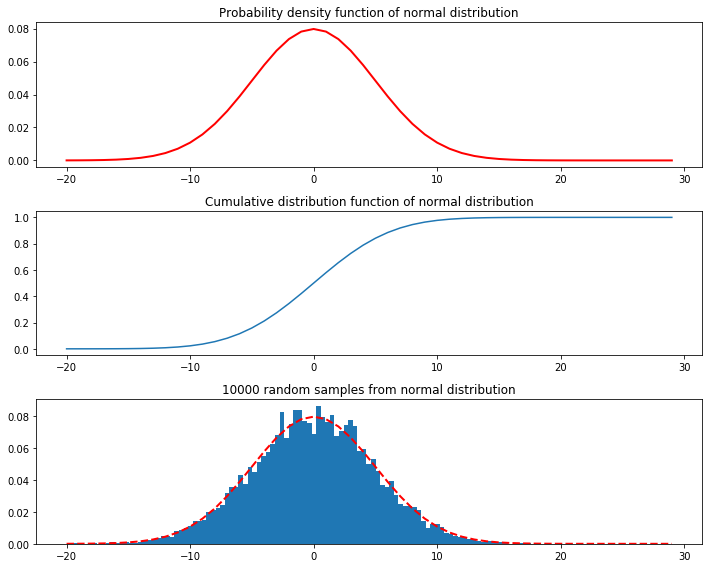

In [47]:
graphic_normal(mu, sigma, rng)

In [38]:
def graphic_normal_mulist(mu, sigma, rng, n_examples=10000):
    
    plt.figure(figsize=(10,8))
    # Generate normal distribution with given mean and standard deviation.
  
    plt.subplot(211) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    for x in mu:
        dist = norm(x, sigma)  
        plt.plot(rng, dist.pdf(rng), linewidth=2)
    plt.title('Probability density function of normal distribution: mean effect')
    plt.grid(True)
    plt.legend(mu)
        # Plot probability density function and of this distribution.
    plt.subplot(212)
    for x in mu:
        dist = norm(x, sigma)
        plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulutative distribution function of normal distribution: mean effect')
    plt.grid(True)
    plt.legend(mu)

def graphic_normal_sigmalist(mu, sigma, rng, n_examples=10000):
   
    plt.figure(figsize=(10,8))
    # Generate normal distribution with given mean and standard deviation.

    plt.subplot(211) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    for s in sigma:
        dist = norm(mu, s)  
        plt.plot(rng, dist.pdf(rng), linewidth=2)
    plt.title('Probability density function of normal distribution: sigma effect')
    plt.grid(True)
    plt.legend(sigma)
        # Plot probability density function and of this distribution.
    plt.subplot(212)
    for s in sigma:
        dist = norm(mu, s)
        plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulative distribution function of normal distribution: sigma effect')
    plt.grid(True)
    plt.legend(sigma)


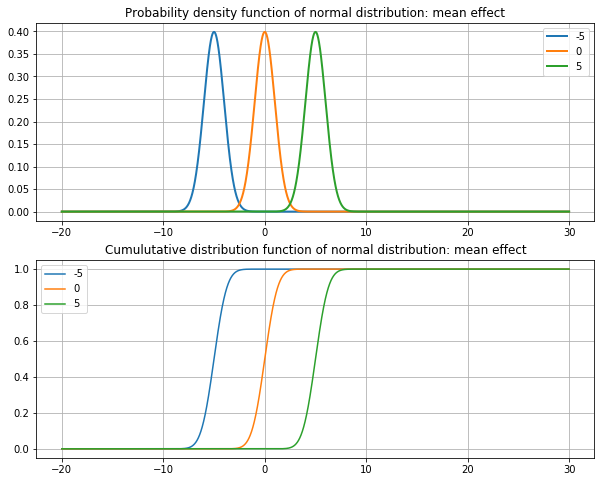

In [45]:
#Veamos el efecto del cambio en la media
graphic_normal_mulist([-5,0,5],1,np.arange(-20,30,0.01))

*La media (para la distribucion normal) segun observamos en graficos anteriores define el plano de simetria de la distribucion. En las graficas anteriores lo mostramos para 3 situaciones $\mu=-5,0,5$.*

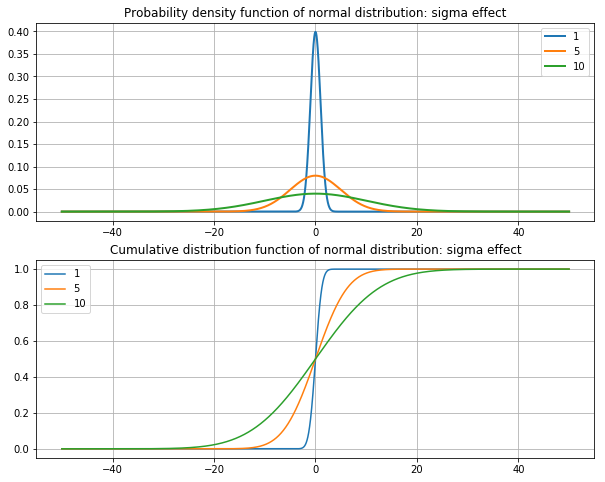

In [44]:
graphic_normal_sigmalist(0,[1,5,10],np.arange(-50,50,0.01))

*La desviacion estandar, $\sigma$, (para la distribucion normal) segun observamos en graficos anteriores define la dispersion de valores respecto a la media. Un valor mas chico de $\sigma$ implica valores mas agrupados respecto a la media y viceversa. En las graficas anteriores lo mostramos para 3 situaciones $\sigma=1,5,10$.*